In [2]:
# Import the pandas and numpy libraries
import pandas as pd
import numpy as np

# Load and preview the dataset
df1 = pd.read_csv('/Users/manan/Downloads/AOT/Module 5/Module5_assignment_dataset.csv')
df1.head()

,id,gpa,gre,college_prep,major_applied,num_ext_act,num_ap_passed,essay_score,num_letter_rec,fasfa_status,admission
0,1,3.43,284,Yes,Communications,1,8,6,3,Completed,Rejected
1,2,3.31,297,Yes,Communications,4,8,10,3,In Progress,Accepted
2,3,3.08,304,Yes,Life Sciences,0,5,7,3,Not Started,Accepted
3,4,3.70,309,Yes,Social Sciences,0,7,4,2,In Progress,Accepted
4,5,3.04,295,No,Communications,5,5,10,2,Completed,Accepted


In [51]:
# Standard deviation of GPA
std_gpa = df1['gpa'].std()

# Standard deviation of GRE scores
std_gre = df1['gre'].std()

# Standard deviation of number of AP classes passed
std_ap_passed = df1['num_ap_passed'].std()

# Standard deviation of essay scores
std_essay_score = df1['essay_score'].std()

# Print the results
print("Standard Deviations:")
print("GPA: ", std_gpa)
print("GRE: ", std_gre)
print("Number of AP Passed: ", std_ap_passed)
print("Essay Score: ", std_essay_score)

Standard Deviations:
GPA:  0.4333458502870847
GRE:  14.994175609298733
Number of AP Passed:  2.5830600903535674
Essay Score:  2.288206323985592


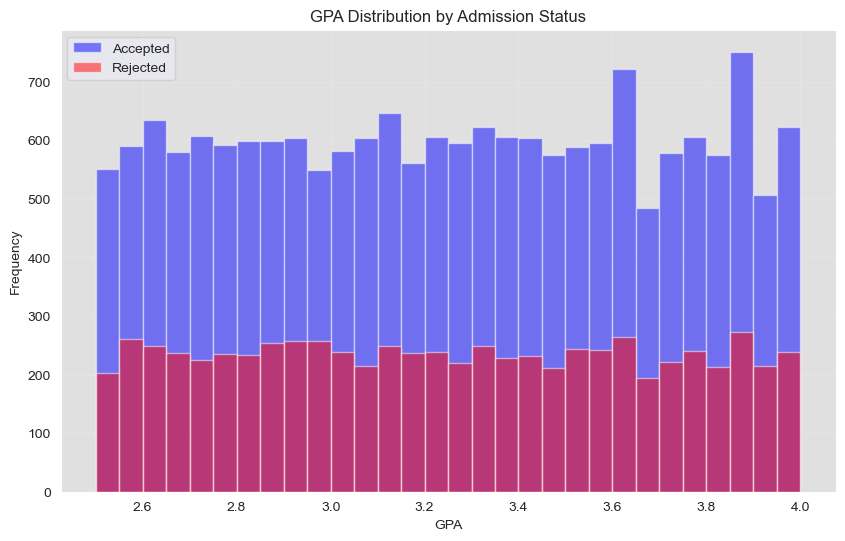

In [53]:
# Visualize GPA distribution by admission status
plt.figure(figsize=(10, 6))

# Plot histogram for accepted students' GPA
df1[df1['admission'] == 'Accepted']['gpa'].hist(alpha=0.5, color='blue', bins=30, label='Accepted')

# Plot histogram for rejected students' GPA
df1[df1['admission'] == 'Rejected']['gpa'].hist(alpha=0.5, color='red', bins=30, label='Rejected')

# Set visualization style
sns.set_style("darkgrid")
plt.legend() 
plt.title('GPA Distribution by Admission Status')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.grid(color='white', linestyle='-', linewidth=0.5, alpha=0.2)
ax = plt.gca()
ax.set_facecolor('#e0e0e0')
# Display the plot
plt.show() 

In [ ]:
# The GPA distribution for both "Accepted" and "Rejected" students is mostly even across the range. 
# The blue bars, which represent accepted students, are taller than the red bars, which represent rejected students
# at all GPA levels, meaning more students are accepted than rejected at each GPA level. #

In [17]:
# Identify the categorical columns to dummy code
categorical_columns = ['college_prep', 'major_applied', 'fasfa_status', 'admission']

# Apply dummy coding to the above columns
df1_dummies = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)

# Display the rows of the transformed dataset
df1_dummies.head()

,id,gpa,gre,num_ext_act,num_ap_passed,essay_score,num_letter_rec,college_prep_Yes,major_applied_Business,major_applied_Communications,major_applied_Engineering,major_applied_History,major_applied_Information Systems,major_applied_Language,major_applied_Life Sciences,major_applied_Social Sciences,fasfa_status_In Progress,fasfa_status_Not Started,admission_Rejected
0,1,3.43,284,1,8,6,3,1,0,1,0,0,0,0,0,0,0,0,1
1,2,3.31,297,4,8,10,3,1,0,1,0,0,0,0,0,0,1,0,0
2,3,3.08,304,0,5,7,3,1,0,0,0,0,0,0,1,0,0,1,0
3,4,3.70,309,0,7,4,2,1,0,0,0,0,0,0,0,1,1,0,0
4,5,3.04,295,5,5,10,2,0,0,1,0,0,0,0,0,0,0,0,0


In [49]:
# Import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report, confusion_matrix 

# Define features variables for the x and y
X = df1_dummies.drop(target_column, axis=1) 
y = df1_dummies[target_column]

# Split data into training
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train the Random Forest model
rfc = RandomForestClassifier(n_estimators=600)  # Initialize the model
rfc.fit(X_train, y_train)  # Fit the model on training data

# Make predictions on the test set
predictions = rfc.predict(X_test)  # Predict on testing data

# Print the report and matrix evaluation
print("Classification Report for Random Forest Model:")
print(classification_report(y_test, predictions))

print("Confusion Matrix for Random Forest Model:")
print(confusion_matrix(y_test, predictions))

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.72      0.99      0.83      4490
           1       0.24      0.00      0.01      1760

    accuracy                           0.72      6250
   macro avg       0.48      0.50      0.42      6250
weighted avg       0.58      0.72      0.60      6250

Confusion Matrix for Random Forest Model:
[[4465   25]
 [1752    8]]
